In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder,
                                   LabelEncoder,
                                   MinMaxScaler)
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             classification_report,
                             ConfusionMatrixDisplay,
                             RocCurveDisplay,
                             DetCurveDisplay)
from sklearn.tree import plot_tree


In [16]:
url = 'https://raw.githubusercontent.com/selva86/' + \
'datasets/master/orange_juice_withmissing.csv'

In [17]:
df_raw = pd.read_csv(url)
df_raw

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0.0
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [19]:
display(df_raw.sample(15, random_state=2024))

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
963,MM,229,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.680000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
219,CH,272,7.0,1.86,2.13,0.00,0.00,0.0,0.0,0.989732,2.13,1.86,0.27,Yes,0.000000,0.000000,0.27,0.0
770,MM,229,2.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,2.0
556,MM,275,1.0,1.96,2.13,0.00,0.74,0.0,1.0,0.477037,1.39,1.96,-0.57,No,0.347418,0.000000,0.17,1.0
793,MM,257,1.0,1.76,2.18,0.00,0.00,0.0,0.0,0.083886,2.18,1.76,0.42,No,0.000000,0.000000,0.42,1.0
952,MM,267,2.0,1.86,2.18,0.00,0.40,0.0,1.0,0.003817,1.78,1.86,-0.08,No,0.183486,0.000000,0.32,2.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
833,MM,241,3.0,1.79,2.23,0.00,0.00,0.0,0.0,0.204800,2.23,1.79,0.44,No,0.000000,0.000000,0.44,3.0
824,CH,232,4.0,1.79,2.09,0.00,0.00,0.0,0.0,0.867041,2.09,1.79,0.30,No,0.000000,0.000000,0.30,4.0
138,CH,278,2.0,1.99,2.18,0.00,0.00,0.0,0.0,0.988272,2.18,1.99,0.19,No,0.000000,0.000000,0.19,2.0


In [20]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ','_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1
    )
    .drop(['store'], axis=1)
    .drop_duplicates()
    .rename(columns={'purchase':'target'})
    .astype({'storeid':'category',
             'target':'category',
             'store7':'category'}) 
)

In [21]:
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] + 
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)

In [22]:
df

,target,weekofpurchase,storeid,pricech,pricemm,discch,discmm,specialch,specialmm,loyalch,salepricemm,salepricech,pricediff,store7,pctdiscmm,pctdiscch,listpricediff
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27


In [23]:
df_train, df_test = train_test_split(df, 
                                     random_state=2024, 
                                     test_size=0.20, 
                                     stratify=df['target'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 180 to 580
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   target          836 non-null    category
 1   weekofpurchase  836 non-null    int64   
 2   storeid         836 non-null    category
 3   pricech         836 non-null    float64 
 4   pricemm         834 non-null    float64 
 5   discch          834 non-null    float64 
 6   discmm          832 non-null    float64 
 7   specialch       834 non-null    float64 
 8   specialmm       833 non-null    float64 
 9   loyalch         833 non-null    float64 
 10  salepricemm     832 non-null    float64 
 11  salepricech     835 non-null    float64 
 12  pricediff       835 non-null    float64 
 13  store7          836 non-null    category
 14  pctdiscmm       833 non-null    float64 
 15  pctdiscch       834 non-null    float64 
 16  listpricediff   836 non-null    float64 
dtypes: category(3), flo

In [24]:
display(df_train.describe(include="number").T)
display(df_train.describe(include="category").T)

,count,mean,std,min,25%,50%,75%,max
weekofpurchase,836.0,254.892344,15.502842,227.000000,240.0000,258.00,269.000000,278.000000
pricech,836.0,1.869438,0.101794,1.690000,1.7900,1.86,1.990000,2.090000
pricemm,834.0,2.086882,0.132199,1.690000,2.0900,2.09,2.180000,2.290000
discch,834.0,0.052782,0.117047,0.000000,0.0000,0.00,0.000000,0.500000
discmm,832.0,0.126010,0.216021,0.000000,0.0000,0.00,0.240000,0.800000
specialch,834.0,0.141487,0.348732,0.000000,0.0000,0.00,0.000000,1.000000
specialmm,833.0,0.162065,0.368732,0.000000,0.0000,0.00,0.000000,1.000000
loyalch,833.0,0.563482,0.312080,0.000011,0.3200,0.60,0.863466,0.999947
salepricemm,832.0,1.961442,0.252089,1.190000,1.6900,2.09,2.142500,2.290000
salepricech,835.0,1.816731,0.143381,1.390000,1.7500,1.86,1.890000,2.090000


,count,unique,top,freq
target,836,2,CH,512
storeid,836.0,5.0,7.0,263.0
store7,836,2,No,573


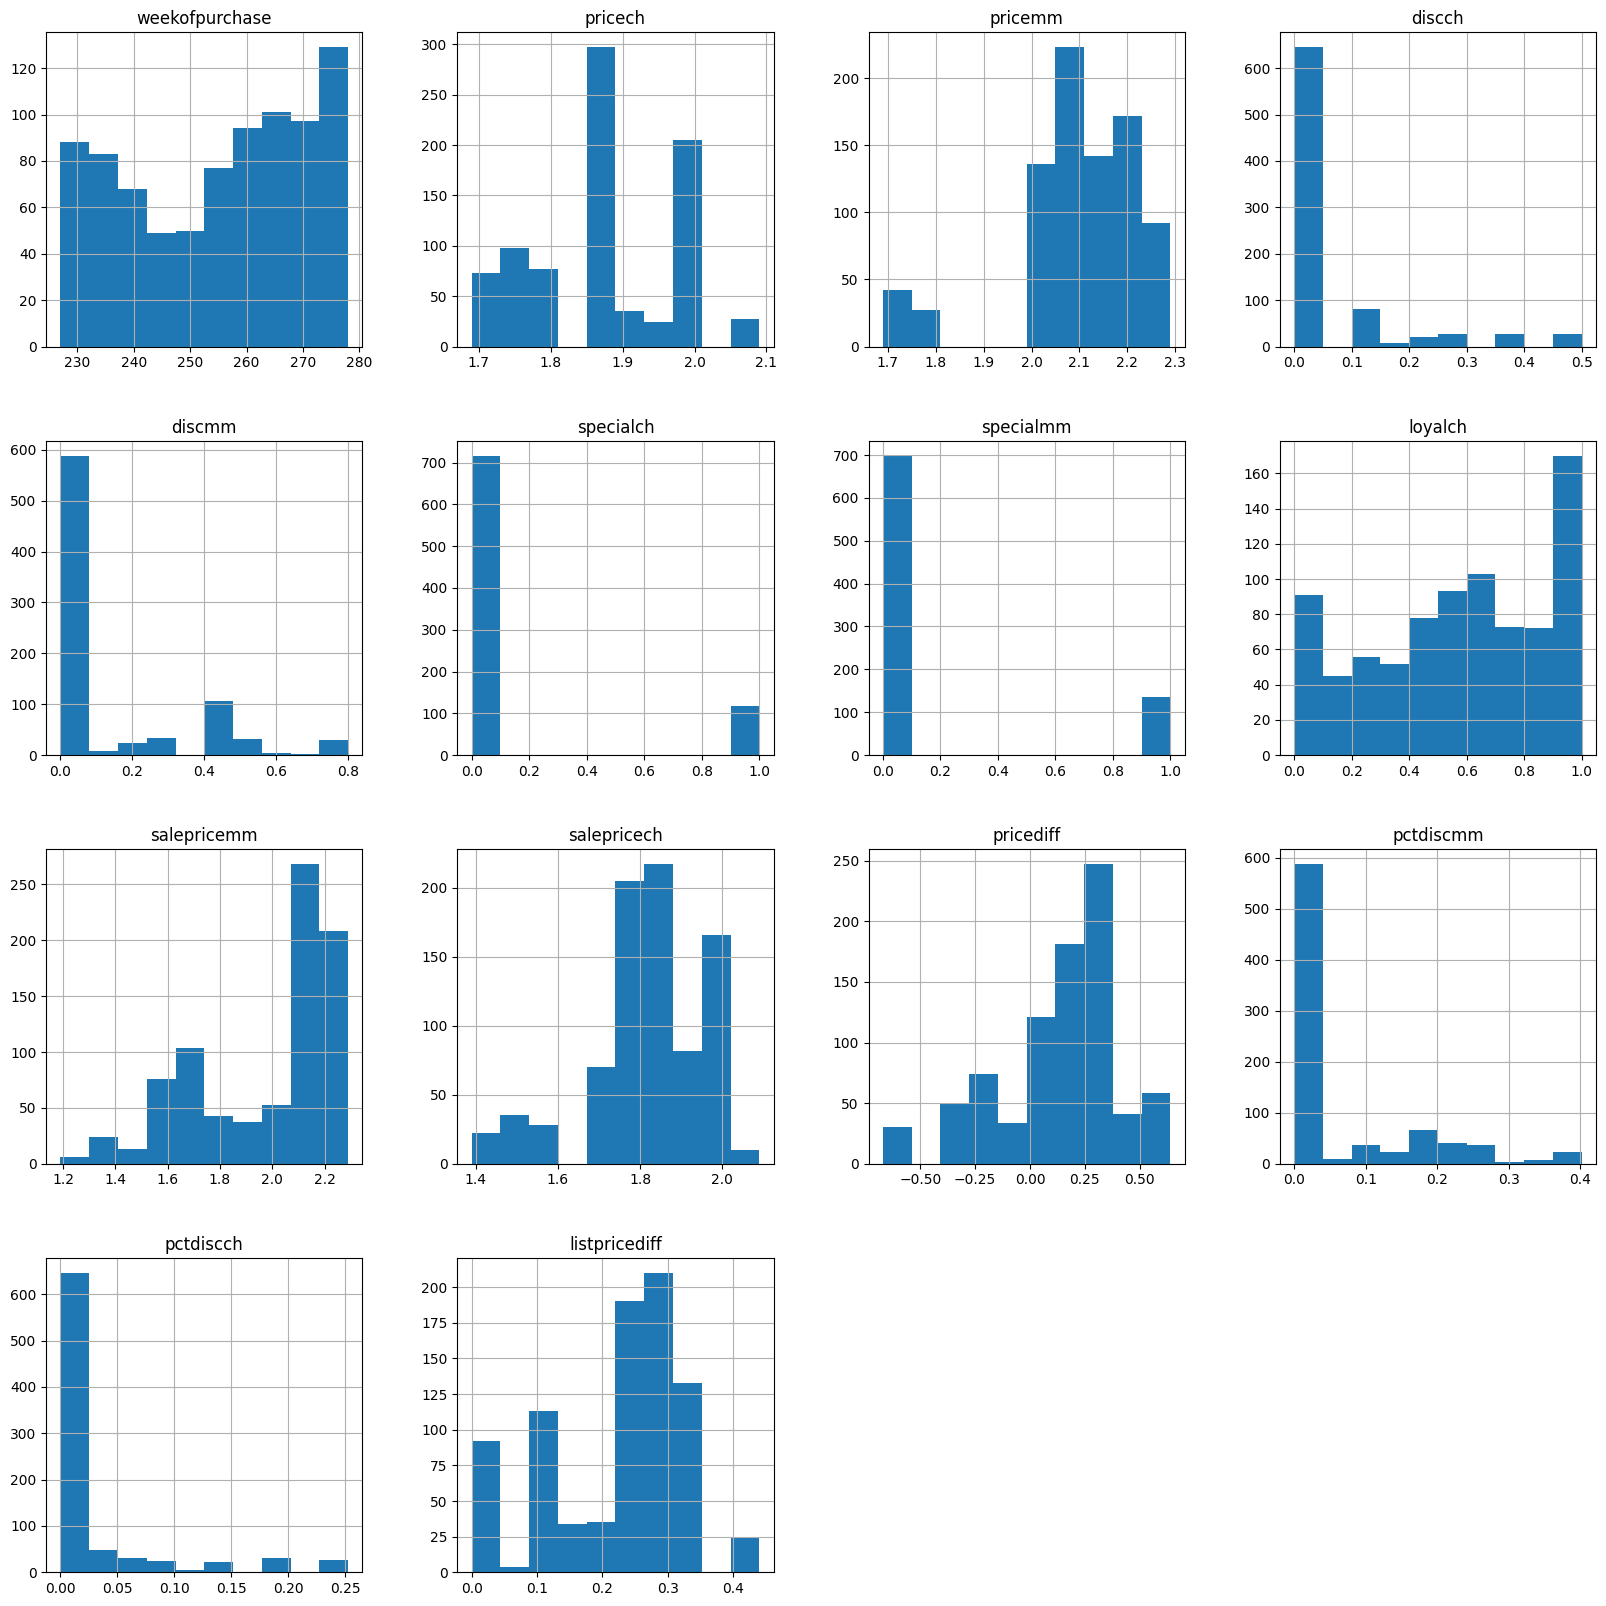

In [25]:
df_train.hist(figsize=(20,20))
plt.show()

<Axes: xlabel='count', ylabel='store7'>

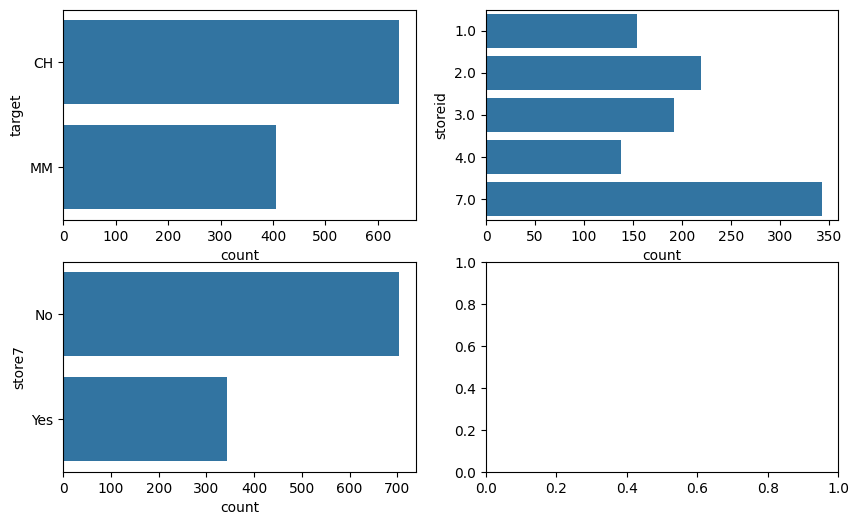

In [26]:
fig, ax = plt.subplots(2, 2,  figsize= (10, 6))
sns.countplot(data= df, y= 'target', ax= ax[0, 0])
sns.countplot(data= df, y= 'storeid', ax= ax[0, 1])
sns.countplot(data= df, y= 'store7', ax= ax[1, 0])



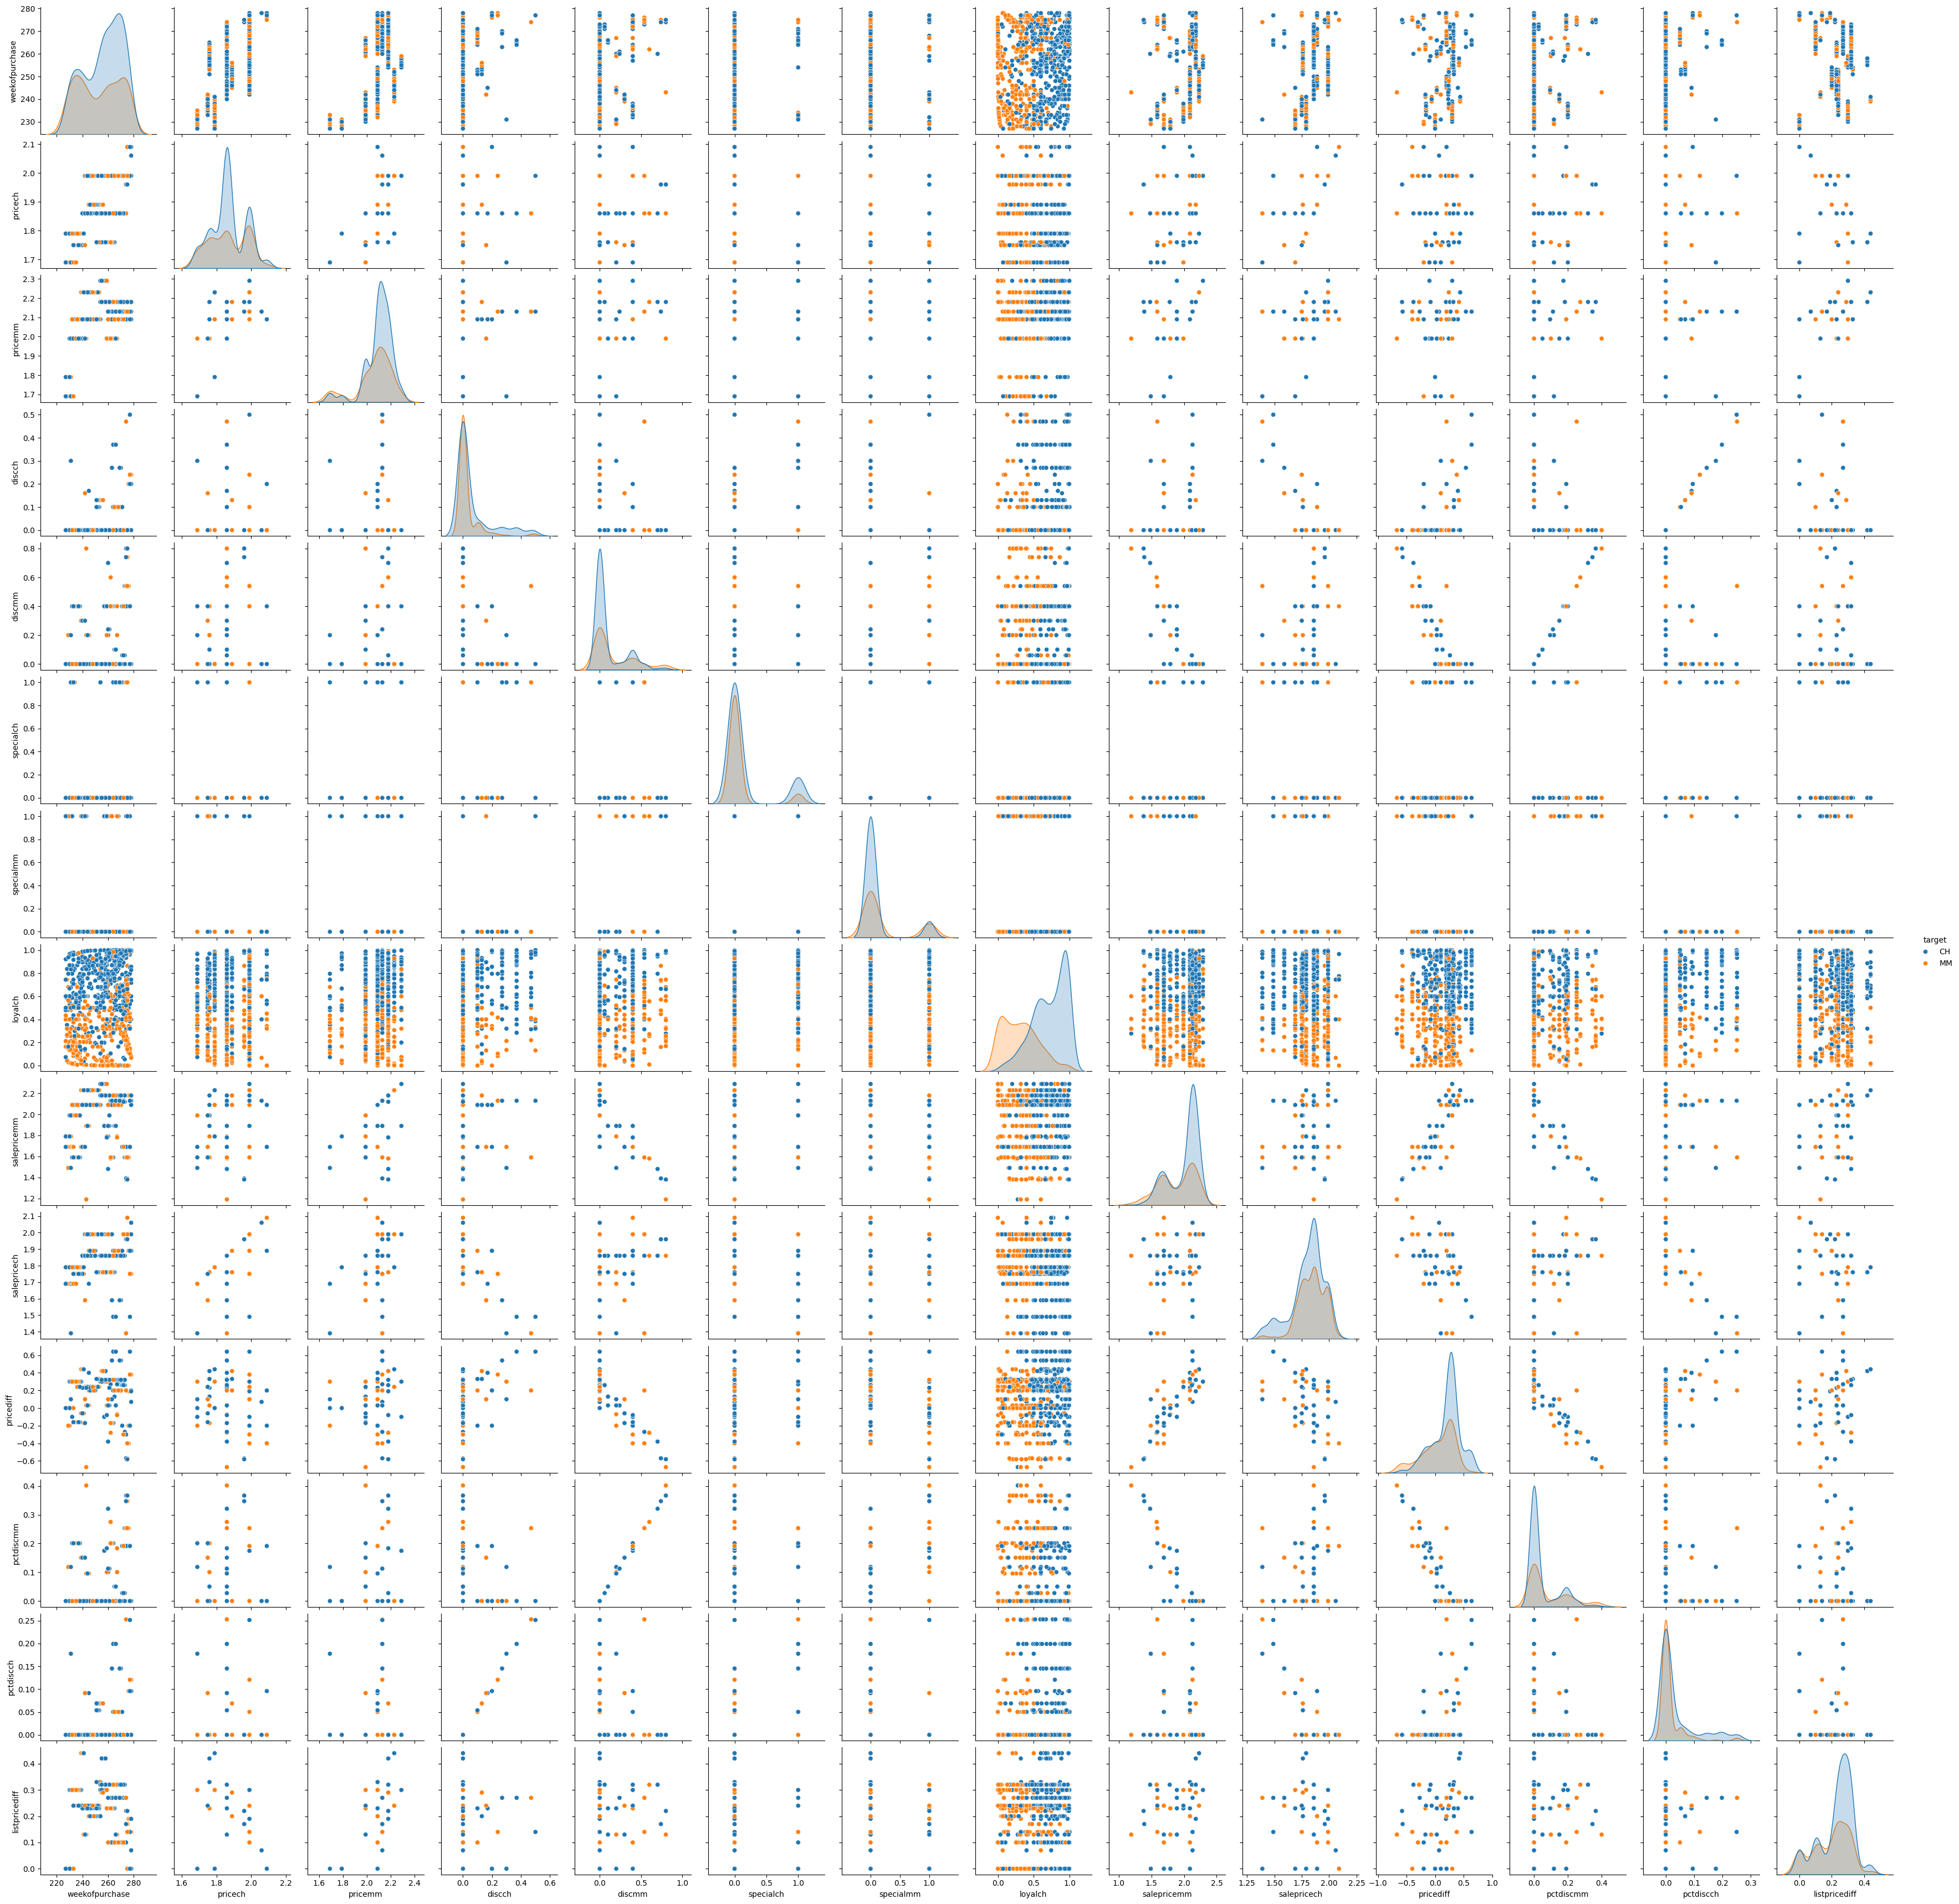

In [27]:
sns.pairplot(data=df_train, hue = "target")
plt.show()

<Axes: xlabel='count', ylabel='store7'>

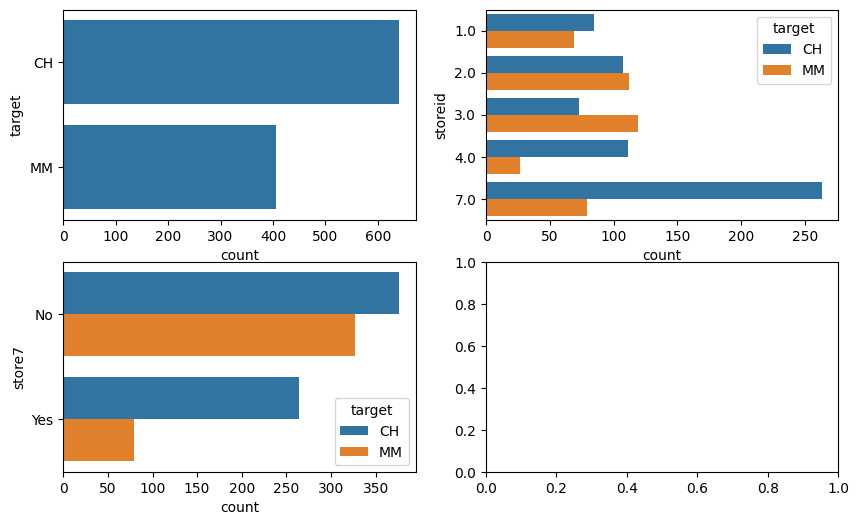

In [29]:
fig, ax = plt.subplots(2, 2,  figsize= (10, 6))
sns.countplot(data= df, y= 'target', ax= ax[0, 0])
sns.countplot(data= df, y= 'storeid', hue='target' , ax= ax[0, 1])
sns.countplot(data= df, y= 'store7', hue='target', ax= ax[1, 0])

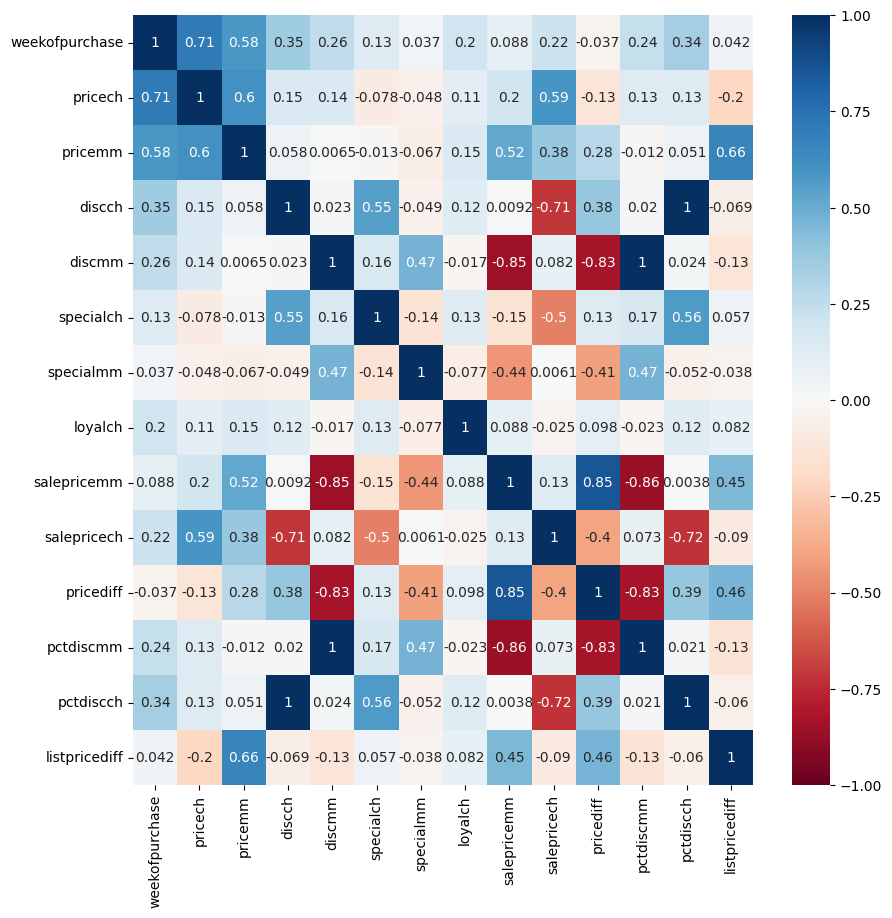

In [34]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_train.select_dtypes("number").corr(),vmin=-1, vmax=1, annot=True, cmap="RdBu", ax=ax)
plt.show()

In [35]:
#Machine Learning
# Step 4. Create a machine learning model
# 4.1 Split features and reponse
X_train = df_train.drop('target', axis=1).reset_index(drop=True)
y_train = df_train['target'].reset_index(drop=True)
X_test = df_test.drop('target', axis=1).reset_index(drop=True)
y_test = df_test['target'].reset_index(drop=True)

In [39]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [40]:
cat_cols = X_train.select_dtypes("category").columns
num_cols = X_train.select_dtypes("number").columns

In [44]:
cat_proc = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))

])

num_proc = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

processor = ColumnTransformer(transformers=[
    ("cat", cat_proc, cat_cols),
    ("num", num_proc, num_cols)

])

In [45]:
clf_tree =  Pipeline([
    ("proc", processor),
    ('tree', DecisionTreeClassifier(class_weight="balanced"))
])

In [46]:
clf_tree.fit(X_train, y_train_enc)

Pipeline(steps=[('proc',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['storeid', 'store7'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['weekofpurchase', 'pricech', 'pricemm', 'discch', 'discmm', 'specialch',
       'specialmm', 'loyalch', 'salepricemm', 'salepricech', 'pricediff',
       'pctdiscmm', 'pctdiscch', 'listpricediff'],
      dtype='object'))])),
                ('tree', DecisionTreeClassifier(class_weight='balanced'))])

In [47]:
y_pred = clf_tree.predict(X_test)

In [48]:
print(f'accuracy: {accuracy_score(y_test_enc, y_pred)}')

accuracy: 0.7904761904761904


In [49]:
print(f'f1_score: {f1_score(y_test_enc, y_pred)}')

f1_score: 0.7215189873417721


In [50]:
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          CH       0.81      0.85      0.83       128
          MM       0.75      0.70      0.72        82

    accuracy                           0.79       210
   macro avg       0.78      0.77      0.78       210
weighted avg       0.79      0.79      0.79       210



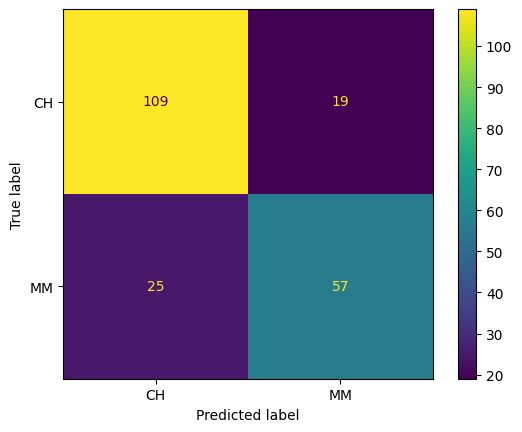

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test_enc,y_pred,display_labels=label_encoder.classes_)
plt.show()

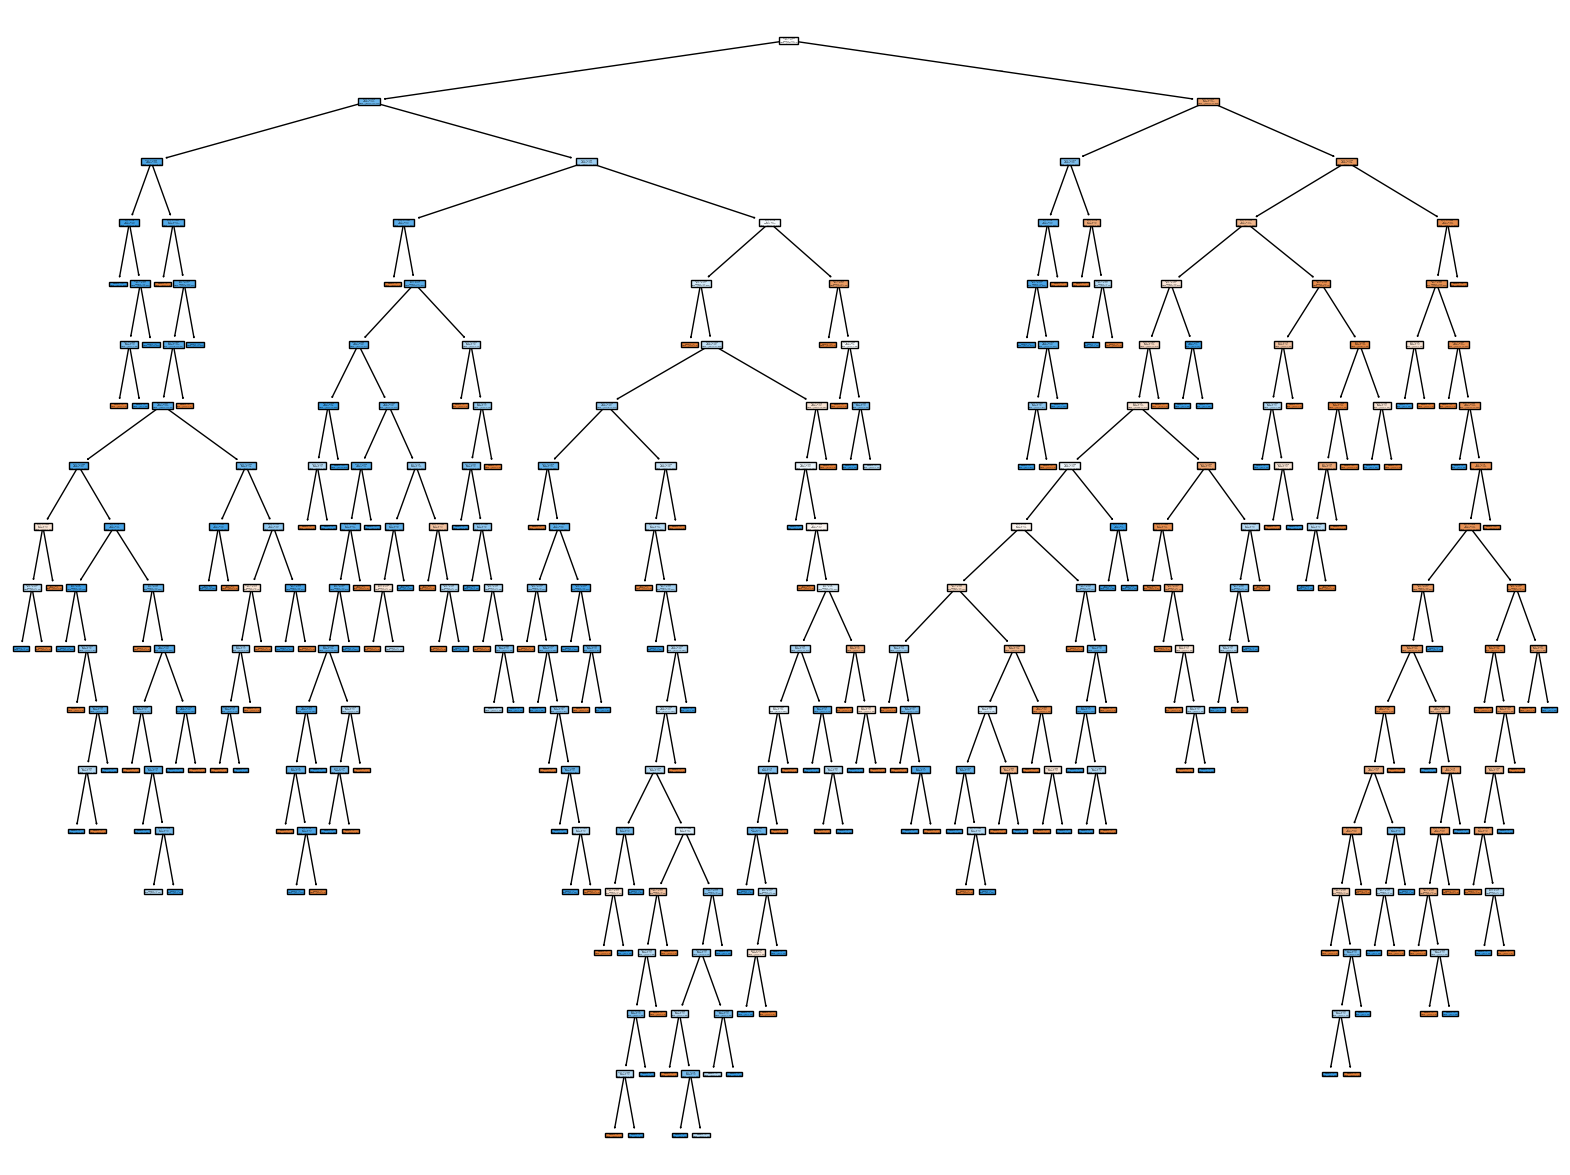

In [52]:
my_tree = clf_tree.named_steps['tree']
plt.figure(figsize=(20,15))
plot_tree(my_tree, filled=True)
plt.show()